<a href="https://colab.research.google.com/github/Jyotiraditya7/Time-series/blob/main/life_expectancy(all_implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lightgbm

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/LE.csv")
life_exp=df
df = df [['Country','Year','Status','Life expectancy']]

In [ ]:
df.head()

,Country,Year,Status,Life expectancy
0,Afghanistan,2015,Developing,65.0
1,Afghanistan,2014,Developing,59.9
2,Afghanistan,2013,Developing,59.9
3,Afghanistan,2012,Developing,59.5
4,Afghanistan,2011,Developing,59.2


Learning rate set to 0.304491
0:	learn: 7.9652996	total: 48.2ms	remaining: 4.77s
1:	learn: 6.8750145	total: 52.1ms	remaining: 2.55s
2:	learn: 6.3649201	total: 53.6ms	remaining: 1.73s
3:	learn: 6.0458584	total: 56.7ms	remaining: 1.36s
4:	learn: 5.7968748	total: 58.3ms	remaining: 1.11s
5:	learn: 5.6849516	total: 59.7ms	remaining: 936ms
6:	learn: 5.5930909	total: 61.7ms	remaining: 820ms
7:	learn: 5.5501911	total: 63.2ms	remaining: 727ms
8:	learn: 5.5157724	total: 64ms	remaining: 647ms
9:	learn: 5.4922729	total: 65ms	remaining: 585ms
10:	learn: 5.4620773	total: 65.8ms	remaining: 533ms
11:	learn: 5.4609070	total: 66.7ms	remaining: 489ms
12:	learn: 5.4574215	total: 67.5ms	remaining: 452ms
13:	learn: 5.4314251	total: 68.3ms	remaining: 420ms
14:	learn: 5.4191324	total: 69.1ms	remaining: 392ms
15:	learn: 5.4029769	total: 70.1ms	remaining: 368ms
16:	learn: 5.3918803	total: 71.1ms	remaining: 347ms
17:	learn: 5.3861049	total: 72ms	remaining: 328ms
18:	learn: 5.3766558	total: 72.8ms	remaining: 310m

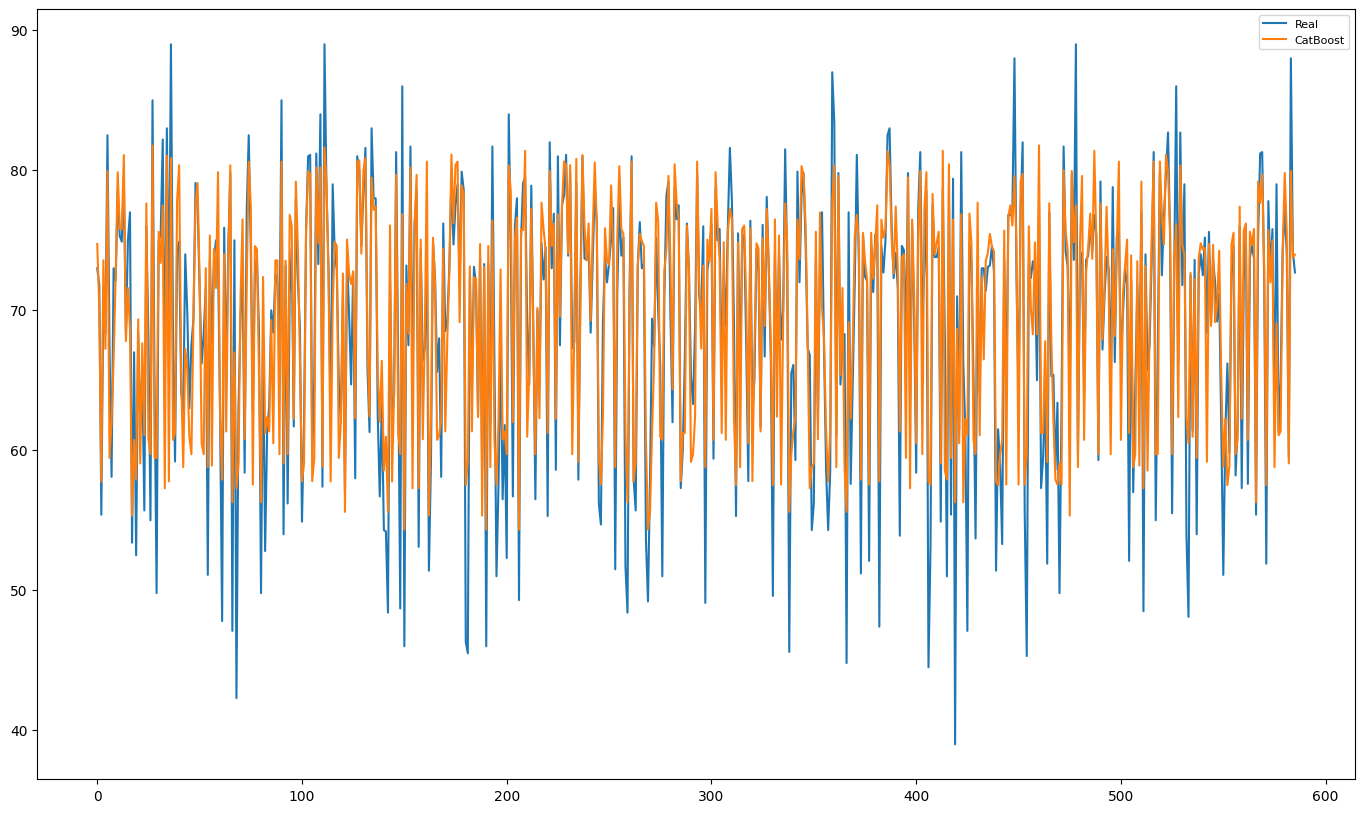

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time
import matplotlib.pyplot as plt

# Create features X and target variable y
X = df.drop(columns='Life expectancy')
y = df['Life expectancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_catboost = train_test_split(X, y, test_size=0.20, random_state=1)

# Define CatBoost pools for training and testing
pool_train = Pool(X_train, y_train, cat_features=['Country','Year','Status'])
pool_test = Pool(X_test, cat_features=['Country','Year','Status'])

# Initialize and train the CatBoost regressor
start = time.time()
cbr = CatBoostRegressor(iterations=100, max_depth=2)
cbr.fit(pool_train)
end = time.time()

# Make predictions on the testing set
y_pred_catboost = cbr.predict(pool_test)

# Calculate R-squared
cb_rsquared = r2_score(y_test_catboost, y_pred_catboost)
print("R Squared for CatBoost: ", cb_rsquared)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
cb_mape = mean_absolute_percentage_error(y_test_catboost, y_pred_catboost)
print("Mean Absolute Percentage Error for CatBoost: ", cb_mape)

# Calculate MSE
cb_mse = mean_squared_error(y_test_catboost, y_pred_catboost)
print("Mean Squared Error for CatBoost: ", cb_mse)

# Print execution time
print('Execution time:', end - start)

# Visualize the predictions of CatBoost along with real values
'''fig = plt.figure(figsize=(17, 10))

# Plot real values
plt.plot(range(y_test_catboost.shape[0]), y_test_catboost, linestyle='-', label='Real')

# Plot predicted values for CatBoost
plt.plot(range(y_test_catboost.shape[0]), y_pred_catboost, linestyle='-', label='CatBoost')

# Add legend and adjust font size
plt.legend(loc='best', prop={'size': 8})

# Show plot
plt.show()'''
# Plot the CatBoost predictions and real values
fig, ax = plt.subplots(figsize=(17, 10))

# Plot real values
ax.plot(range(y_test_catboost.shape[0]), y_test_catboost, linestyle='-', label='Real')

# Plot predicted values for CatBoost
ax.plot(range(y_test_catboost.shape[0]), y_pred_catboost, linestyle='-', label='CatBoost')

# Add legend and adjust font size
ax.legend(loc='best', prop={'size': 8})
plt.show()
# Save the plot in a variable
saved_plot = ax




R Squared for XGBoost:  0.9585556288673358
Mean Absolute Percentage Error for XGBoost:  1.861795645022505
Mean Squared Error for XGBoost:  3.670404779118394
Root Mean Squared Error for XGBoost:  1.9158300496438596
Execution time: 0.15094208717346191


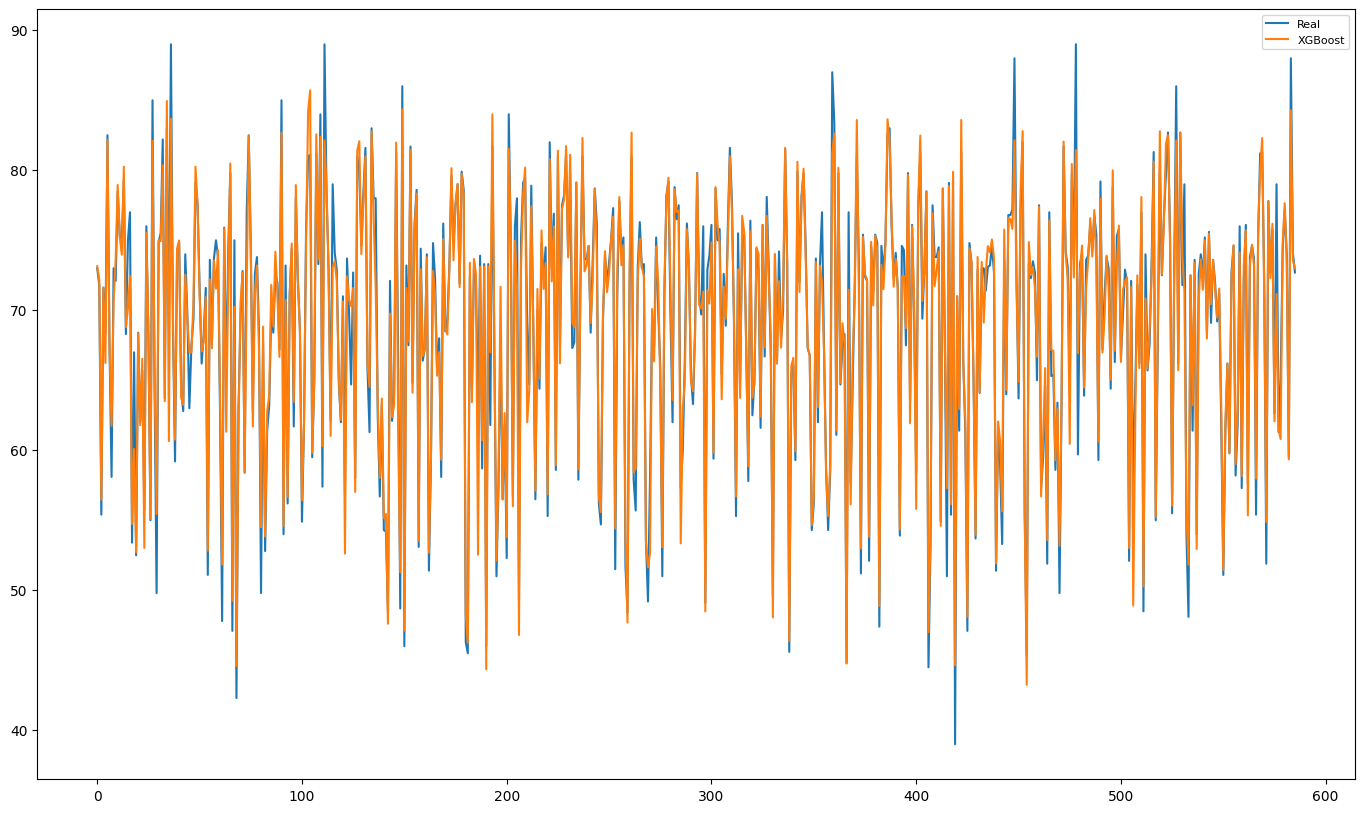

In [ ]:
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time

# Load the data and prepare features X and target variable y
X = df.drop(columns='Life expectancy')
y = df['Life expectancy']

# Label encode categorical variables
lbl = preprocessing.LabelEncoder()
X['Country'] = lbl.fit_transform(X['Country'].astype(str))
X['Year'] = lbl.fit_transform(X['Year'].astype(str))
X['Status'] = lbl.fit_transform(X['Status'].astype(str))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_xgbr = train_test_split(X, y, test_size=0.20, random_state=1)

# Initialize the XGBoost regressor
xgbr = xgb.XGBRegressor()

# Train the XGBoost model
start = time.time()
xgbr.fit(X_train, y_train)
end = time.time()

# Make predictions on the testing set
y_pred_xgbr = xgbr.predict(X_test)



# Calculate R-squared
xgb_rsquared = r2_score(y_test_xgbr, y_pred_xgbr)
print("R Squared for XGBoost: ", xgb_rsquared)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
xgb_mape = mean_absolute_percentage_error(y_test_xgbr, y_pred_xgbr)
print("Mean Absolute Percentage Error for XGBoost: ", xgb_mape)

# Calculate MSE
xgb_mse = mean_squared_error(y_test_xgbr, y_pred_xgbr)
print("Mean Squared Error for XGBoost: ", xgb_mse)

# Calculate RMSE
xgb_rmse = np.sqrt(xgb_mse)
print("Root Mean Squared Error for XGBoost: ", xgb_rmse)


# Print execution time
print('Execution time:', end - start)
import matplotlib.pyplot as plt

# Visualize the predictions of CatBoost along with real values
fig = plt.figure(figsize=(17, 10))

# Plot real values
plt.plot(range(y_test_xgbr.shape[0]), y_test_xgbr, linestyle='-', label='Real')

# Plot predicted values for CatBoost
plt.plot(range(y_test_xgbr.shape[0]), y_pred_xgbr, linestyle='-', label='XGBoost')

# Add legend and adjust font size
plt.legend(loc='best', prop={'size': 8})

# Show plot
plt.show()




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 2342, number of used features: 3
[LightGBM] [Info] Start training from score 69.262724
R squared for LightGBM:  0.9767455250796998
Mean Absolute Percentage Error for LightGBM:  1.8354451598788033
Mean Squared Error for LightGBM:  4.071043187456566
Execution time: 0.11023068428039551


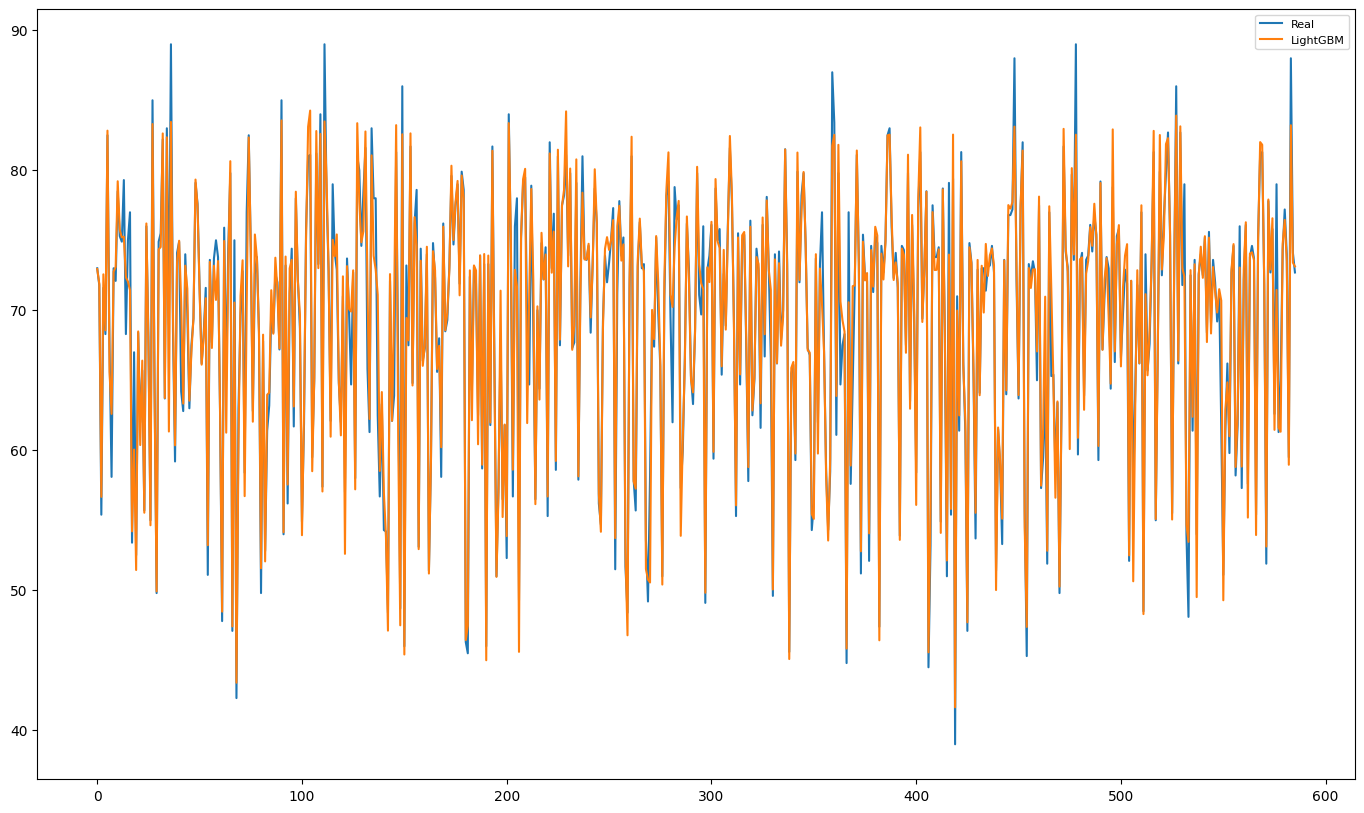

In [ ]:
import lightgbm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import time

# Load the data and prepare features X and target variable y
X = df.drop(columns='Life expectancy')
y = df['Life expectancy']

# Convert object features to categorical
obj_feat = list(X.loc[:, X.dtypes == 'object'].columns.values)
for feature in obj_feat:
    X[feature] = pd.Series(X[feature], dtype="category")

# Initialize the LightGBM regressor
lgbmr = lightgbm.LGBMRegressor()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_lgbm = train_test_split(X, y, test_size=0.20, random_state=1)

# Train the LightGBM model
start = time.time()
lgbmr.fit(X_train, y_train)
end = time.time()

# Make predictions on the testing set
y_pred_lgbm = lgbmr.predict(X_test)

# Calculate R-squared
lgbm_rsquared = np.sqrt(r2_score(y_test_lgbm, y_pred_lgbm))
print("R squared for LightGBM: ", lgbm_rsquared)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
lgbm_mape = mean_absolute_percentage_error(y_test_lgbm, y_pred_lgbm)
print("Mean Absolute Percentage Error for LightGBM: ", lgbm_mape)

# Calculate MSE
lgbm_mse = mean_squared_error(y_test_lgbm, y_pred_lgbm)
print("Mean Squared Error for LightGBM: ", lgbm_mse)

# Print execution time
print('Execution time:', end - start)
# Visualize the predictions of CatBoost along with real values
fig = plt.figure(figsize=(17, 10))

# Plot real values
plt.plot(range(y_test_lgbm.shape[0]), y_test_lgbm, linestyle='-', label='Real')

# Plot predicted values for CatBoost
plt.plot(range(y_test_lgbm.shape[0]), y_pred_lgbm, linestyle='-', label='LightGBM')

# Add legend and adjust font size
plt.legend(loc='best', prop={'size': 8})

# Show plot
plt.show()


In [ ]:
# Calculate residuals
residuals_catboost = y_test - y_pred_catboost
residuals_xgboost = y_test - y_pred_xgbr
residuals_lightgbm = y_test - y_pred_lgbm

# Plotting the residuals
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed

# Plotting residuals for CatBoost
plt.scatter(y_test, residuals_catboost, label='CatBoost', color='blue', alpha=0.5)

# Plotting residuals for XGBoost
plt.scatter(y_test, residuals_xgboost, label='XGBoost', color='green', alpha=0.5)

# Plotting residuals for LightGBM
plt.scatter(y_test, residuals_lightgbm, label='LightGBM', color='red', alpha=0.5)

# Adding horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--')

# Adding title and labels
plt.title('Residuals Plot')
plt.xlabel('Original Values')
plt.ylabel('Residuals')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


NameError: name 'y_test' is not defined

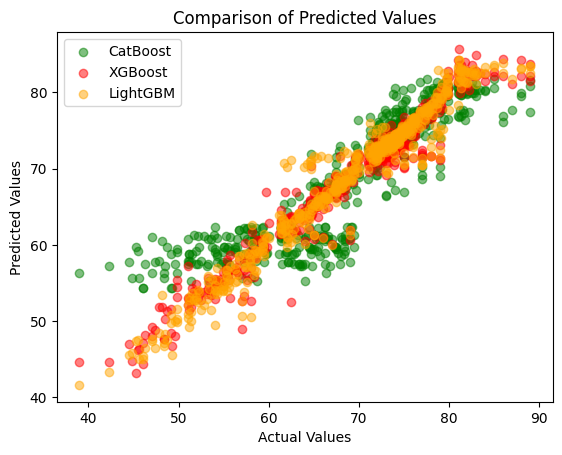

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Original vs CatBoost
plt.scatter(y_test_catboost,y_pred_catboost, color='green', label='CatBoost', alpha=0.5)

# Scatter plot for Original vs XGBoost
plt.scatter(y_test_xgbr, y_pred_xgbr, color='red', label='XGBoost', alpha=0.5)

# Scatter plot for Original vs LightGBM
plt.scatter(y_test_lgbm, y_pred_lgbm, color='orange', label='LightGBM', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted Values')
plt.legend()
plt.show()


# 1. Community support/Performance/Want to tune - XGBOOST
# 2. Hurry to train/Performance/Dont want to tune - LightGBM
# 3. More categorical, GPU, Large data - CatBoost

In [ ]:
df.head()

,Country,Year,Status,Life expectancy
0,Afghanistan,2015,Developing,65.0
1,Afghanistan,2014,Developing,59.9
2,Afghanistan,2013,Developing,59.9
3,Afghanistan,2012,Developing,59.5
4,Afghanistan,2011,Developing,59.2


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
life_exp = life_exp.dropna(axis=0)
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [ ]:
l_encoder= preprocessing.LabelEncoder()
life_exp.loc[:,'Status'] = l_encoder.fit_transform(life_exp.loc[:,'Status'])
life_exp['Status'].value_counts()

Status
1    1407
0     242
Name: count, dtype: int64

In [ ]:
life_exp.loc[:, 'Country'] = l_encoder.fit_transform(life_exp.loc[:, 'Country'])
life_exp['Country'].value_counts()

Country
0      16
1      16
65     15
80     15
79     15
       ..
58      5
115     4
88      4
53      2
38      1
Name: count, Length: 133, dtype: int64

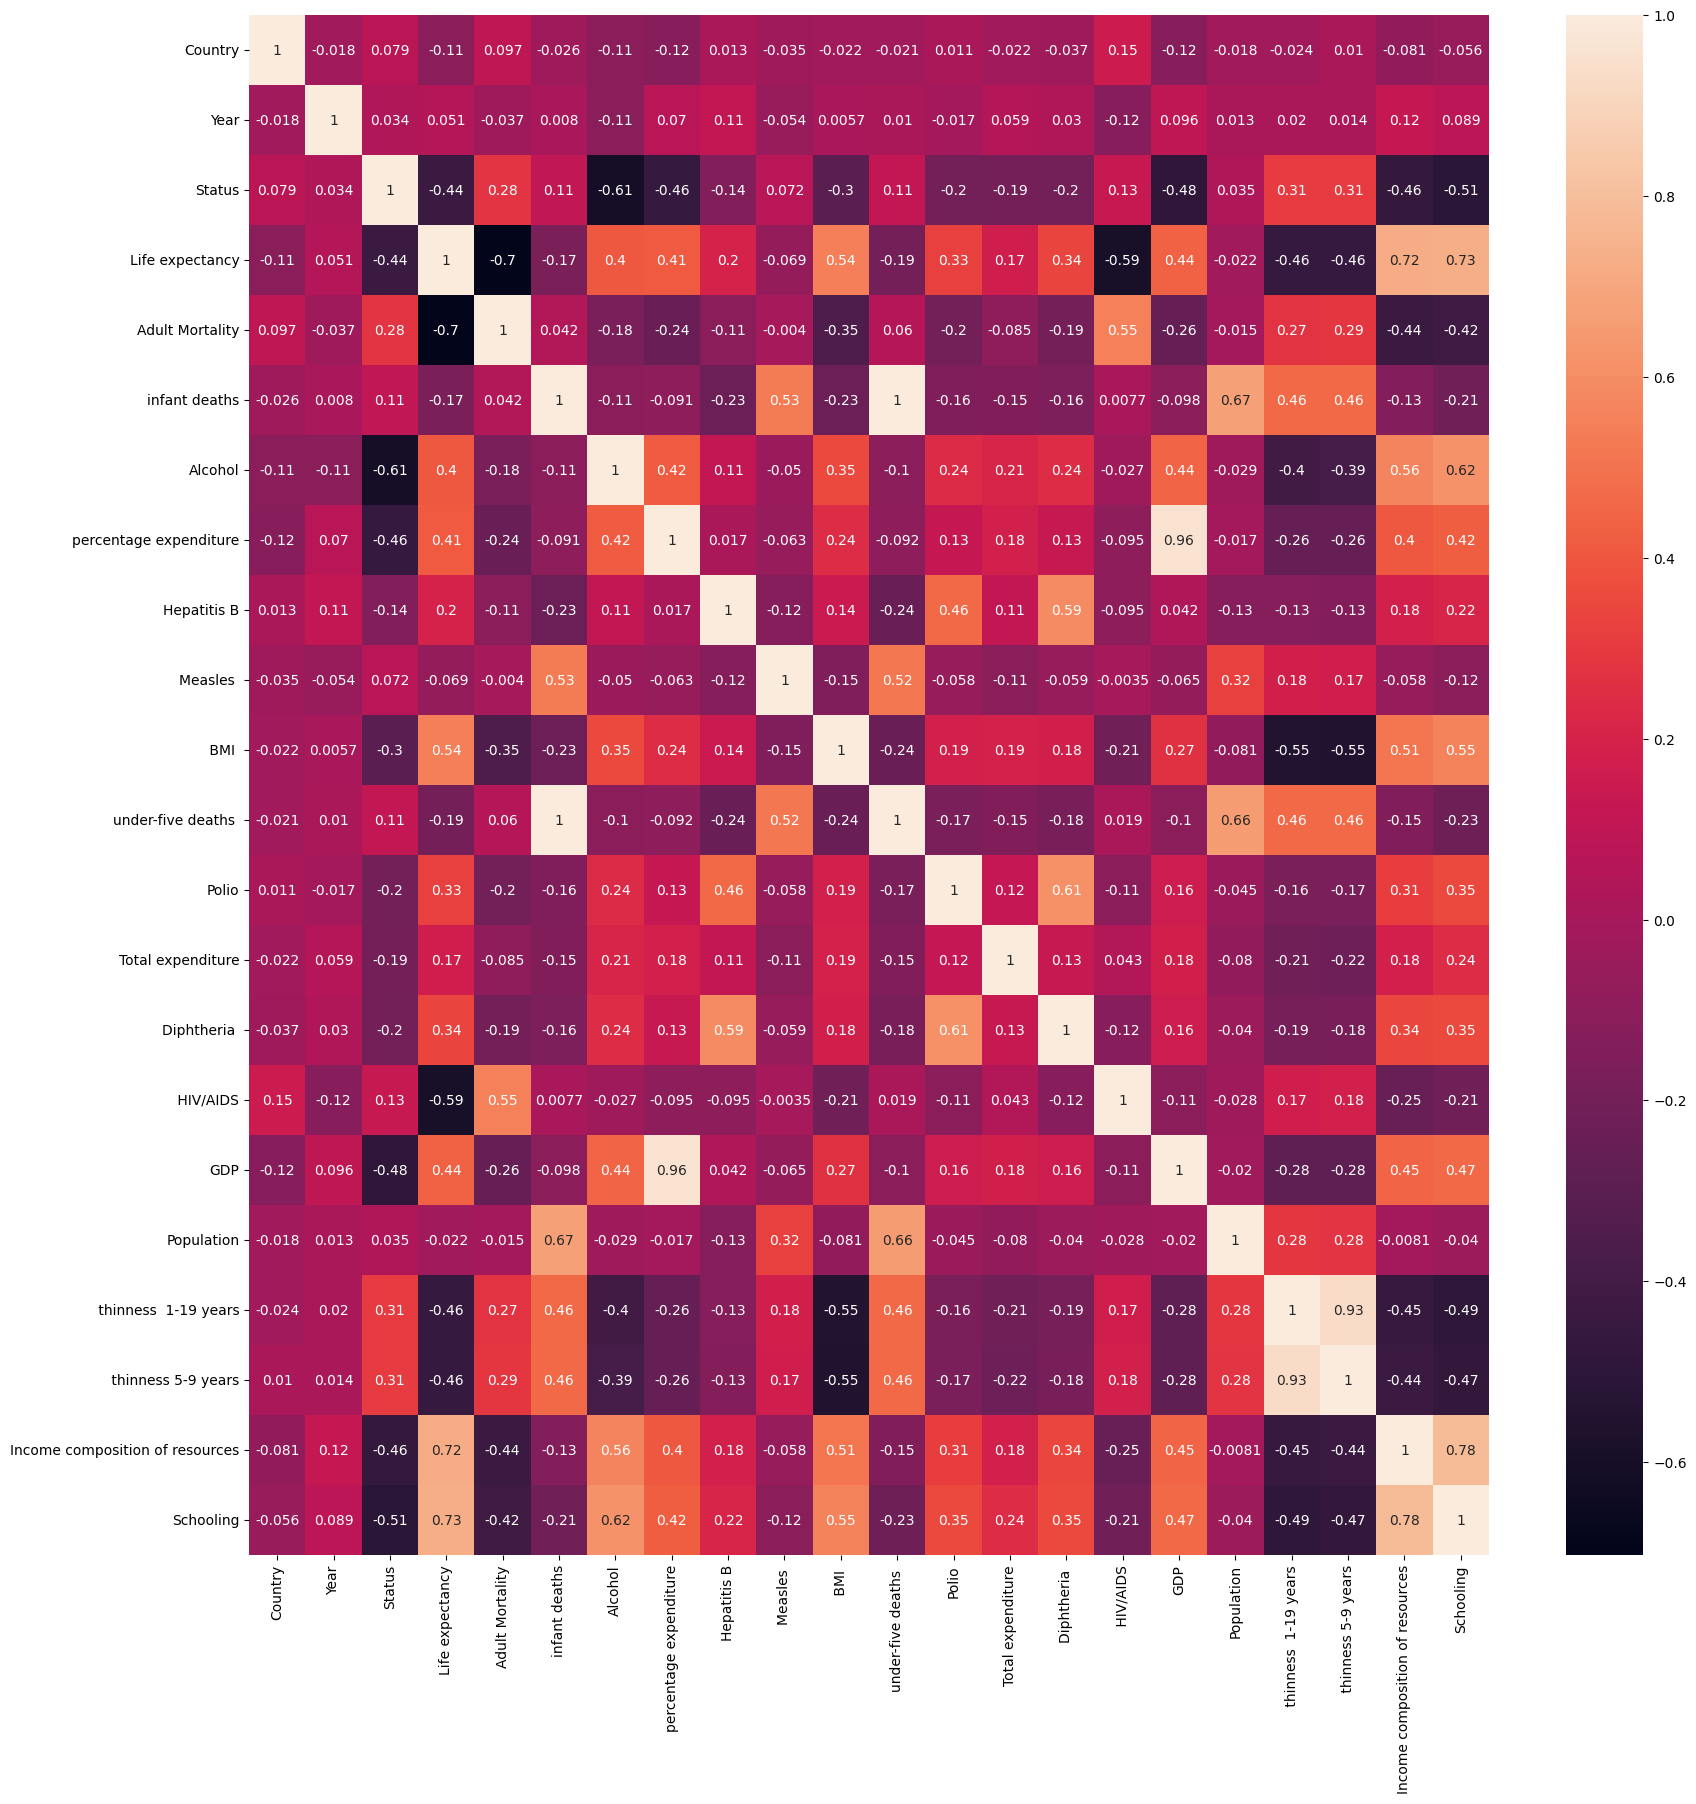

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(life_exp.corr(), annot=True, ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
if 'Life expectancy' not in life_exp.columns:
    raise ValueError("'Life expectancy' column not found in the DataFrame")
target = life_exp['Life expectancy']
features = life_exp[life_exp.columns.difference(['Life expectancy', 'Year'])]

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

# Linear Regression
lr = LinearRegression()

# Fitting model over training data
lr.fit(x_train, y_train)

# Evaluating the model over test data
lr_confidence = lr.score(x_test, y_test)
print("lr confidence:", lr_confidence)
# lr confidence: 0.9538309850283277


lr confidence: -16000.07319616391


In [ ]:
life_exp =life_exp.drop(labels=['Income composition of resources', ' thinness 5-9 years',
                'infant deaths', 'percentage expenditure'], axis=1)
life_exp

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,1,65.0,263,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,10.1
1,0,2014,1,59.9,271,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,10.0
2,0,2013,1,59.9,268,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,9.9
3,0,2012,1,59.5,272,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,9.8
4,0,2011,1,59.2,275,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,132,2004,1,44.3,723,4.36,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.2
2924,132,2003,1,44.5,715,4.06,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.5
2925,132,2002,1,44.8,73,4.43,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,10.0
2926,132,2001,1,45.3,686,1.72,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,9.8


In [ ]:
y = life_exp['Life expectancy']
life_exp = life_exp.drop(labels='Life expectancy', axis=1)
life_exp

,Country,Year,Status,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,1,263,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,10.1
1,0,2014,1,271,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,10.0
2,0,2013,1,268,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,9.9
3,0,2012,1,272,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,9.8
4,0,2011,1,275,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,132,2004,1,723,4.36,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.2
2924,132,2003,1,715,4.06,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.5
2925,132,2002,1,73,4.43,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,10.0
2926,132,2001,1,686,1.72,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,9.8


In [ ]:
y = y.to_numpy(dtype='float64')
y

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

In [ ]:
from sklearn import preprocessing, linear_model, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(life_exp, y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(f'X_train shape -->{x_train.shape}')
print(f'X_valid shape -->{x_valid.shape}')
print(f'X_test shape -->{x_test.shape}')
print(f'y_train shape -->{y_train.shape}')
print(f'y_valid shape -->{y_valid.shape}')
print(f'y_test shape -->{y_test.shape}')

X_train shape -->(1319, 17)
X_valid shape -->(165, 17)
X_test shape -->(165, 17)
y_train shape -->(1319,)
y_valid shape -->(165,)
y_test shape -->(165,)


In [ ]:
x_train

,Country,Year,Status,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
1012,47,2011,1,263,1.64,91.0,120,26.1,58,91.0,4.81,91.0,1.3,1574.978653,25121796.0,6.9,10.9
93,4,2002,1,138,7.81,66.0,0,55.1,13,94.0,8.31,93.0,0.1,2579.193168,3788937.0,1.2,16.3
2008,96,2007,1,133,4.29,93.0,0,5.2,15,93.0,4.60,93.0,0.3,3611.214700,28292724.0,1.2,13.2
2919,132,2008,1,632,3.56,75.0,0,28.6,46,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,9.7
2574,118,2001,1,194,5.92,95.0,7319,19.4,20,97.0,3.32,96.0,0.8,1893.145377,63543322.0,9.3,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,92,2006,1,179,0.03,78.0,7641,19.5,458,77.0,3.40,78.0,0.1,873.772727,15793993.0,21.0,6.5
2214,104,2009,1,21,4.13,98.0,0,26.2,0,99.0,6.65,98.0,0.9,199.571460,17813.0,6.3,10.1
1526,70,2009,0,192,12.40,95.0,0,59.7,0,98.0,7.53,98.0,0.1,11837.391300,3162916.0,2.8,16.6
2567,118,2008,1,162,5.92,98.0,7790,25.7,13,99.0,3.92,99.0,0.3,4378.687460,6654576.0,8.5,12.9


In [ ]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[-0.51128185,  0.78367891,  0.41023228, ...,  0.17827985,
         0.44055795, -0.42801883],
       [-1.61551902, -1.43186106,  0.41023228, ..., -0.16605599,
        -0.79715621,  1.49260545],
       [ 0.74703494, -0.20100552,  0.41023228, ...,  0.22946212,
        -0.79715621,  0.39002484],
       ...,
       [ 0.07935664,  0.29133669, -2.43764338, ..., -0.17616066,
        -0.44972767,  1.59930679],
       [ 1.31199349,  0.04516559,  0.41023228, ..., -0.11980142,
         0.78798649,  0.28332349],
       [ 0.6443152 ,  0.5375078 ,  0.41023228, ..., -0.19886689,
        -0.58001337, -1.63730078]])

In [ ]:
model = linear_model.LinearRegression()
model.fit(X=x_train, y=y_train)
val_hat = model.predict(x_valid)

# Calculate R-squared based on validation set predictions
lr_r_squared = model.score(x_valid, val_hat)
print("R-squared for Linear Regression:", lr_r_squared)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
lr_mape = mean_absolute_percentage_error(y_valid, val_hat)
print("Mean Absolute Percentage Error (MAPE) for Linear Regression:", lr_mape)

# Calculate Mean Squared Error (MSE)
lr_mse = metrics.mean_squared_error(y_valid, val_hat)
print("Mean Squared Error (MSE) for Linear Regression:", lr_mse)


R-squared for Linear Regression: 1.0
Mean Absolute Percentage Error (MAPE) for Linear Regression: 4.273419594495863
Mean Squared Error (MSE) for Linear Regression: 14.462229070381314


In [ ]:
# Define model names
model_names = ['CatBoost', 'XGBoost', 'LightGBM', 'Linear Regression']

# Create a 4x3 matrix with model names as rows and metrics as columns
matrix = np.array([
    [cb_rsquared, cb_mape, cb_mse],
    [xgb_rsquared, xgb_mape, xgb_mse],
    [lgbm_rsquared, lgbm_mape, lgbm_mse],
    [lr_r_squared, lr_mape, lr_mse]
])

# Display the matrix with row and column names
print("Matrix:")
print("\tR-squared\tMAPE\tMSE")
for i in range(len(model_names)):
    print(f"{model_names[i]} |", end="\t")
    for j in range(matrix.shape[1]):
        print(matrix[i][j], end="\t|\t")
    print("\n" + "-"*35)


Matrix:
	R-squared	MAPE	MSE
CatBoost |	0.7847511596077037	|	5.1265922083170645	|	19.06291134076112	|	
-----------------------------------
XGBoost |	0.9585556288673358	|	1.861795645022505	|	3.670404779118394	|	
-----------------------------------
LightGBM |	0.9767455250796998	|	1.8354451598788033	|	4.071043187456566	|	
-----------------------------------
Linear Regression |	1.0	|	4.273419594495863	|	14.462229070381314	|	
-----------------------------------


In [ ]:
# Define model names
model_names = ['CatBoost', 'XGBoost', 'LightGBM', 'Linear Regression']

# Create a 4x3 matrix with model names as rows and metrics as columns
matrix = np.array([
    [cb_rsquared, cb_mape, cb_mse],
    [xgb_rsquared, xgb_mape, xgb_mse],
    [lgbm_rsquared, lgbm_mape, lgbm_mse],
    [lr_r_squared, lr_mape, lr_mse]
])

# Find maximum length for formatting
max_length = max([len(model) for model in model_names] + [len("Metric")])

# Display the matrix with row and column names
print(f"{'Model':<{max_length}} | {'R-squared':<10} | {'MAPE':<10} | {'MSE':<10}")
print("-" * (max_length + 34))
for i in range(len(model_names)):
    print(f"{model_names[i]:<{max_length}} |", end=" ")
    for j in range(matrix.shape[1]):
        print(f"{matrix[i][j]:<10.6f} | ", end="")
    print()

Model             | R-squared  | MAPE       | MSE       
---------------------------------------------------
CatBoost          | 0.784751   | 5.126592   | 19.062911  | 
XGBoost           | 0.958556   | 1.861796   | 3.670405   | 
LightGBM          | 0.976746   | 1.835445   | 4.071043   | 
Linear Regression | 1.000000   | 4.273420   | 14.462229  | 


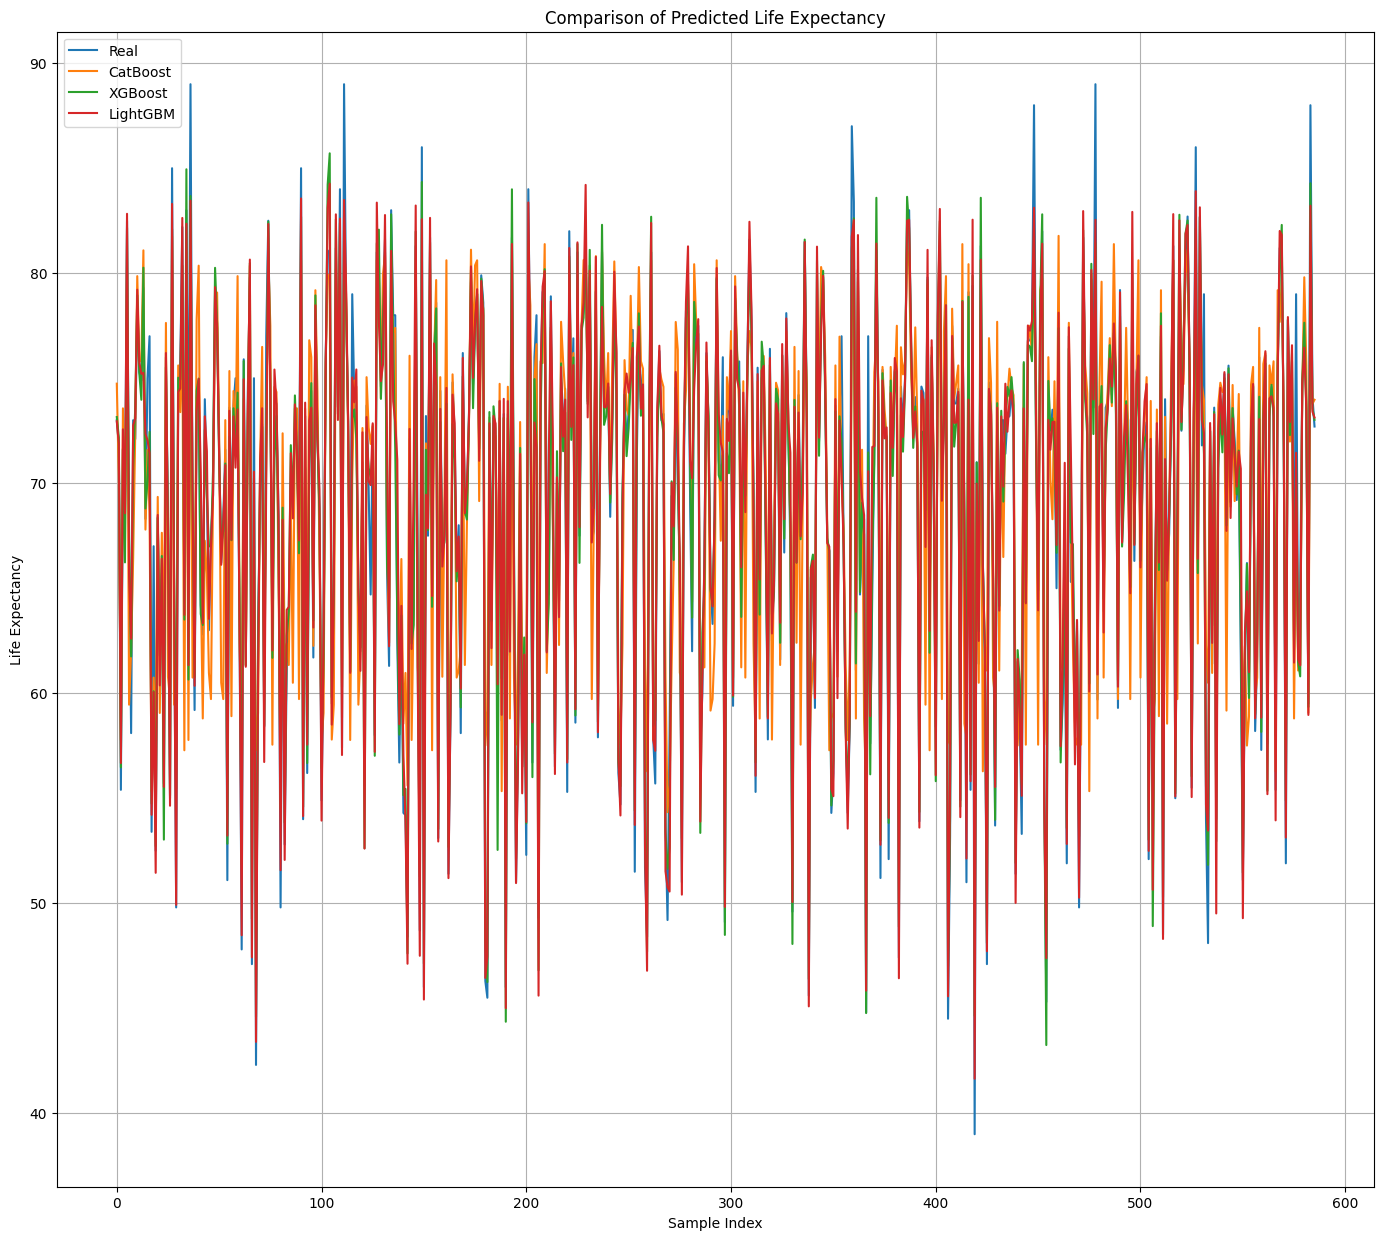

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(17, 15))

plt.plot(range(y_test_lgbm.shape[0]), y_test_lgbm, linestyle='-', label='Real')

plt.plot(y_pred_catboost, label='CatBoost', linestyle='-')
plt.plot(y_pred_xgbr, label='XGBoost', linestyle='-')
plt.plot(y_pred_lgbm, label='LightGBM', linestyle='-')

#plt.plot(val_hat, label='Linear Regression', linestyle='-')

plt.xlabel('Sample Index')
plt.ylabel('Life Expectancy')
plt.title('Comparison of Predicted Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()




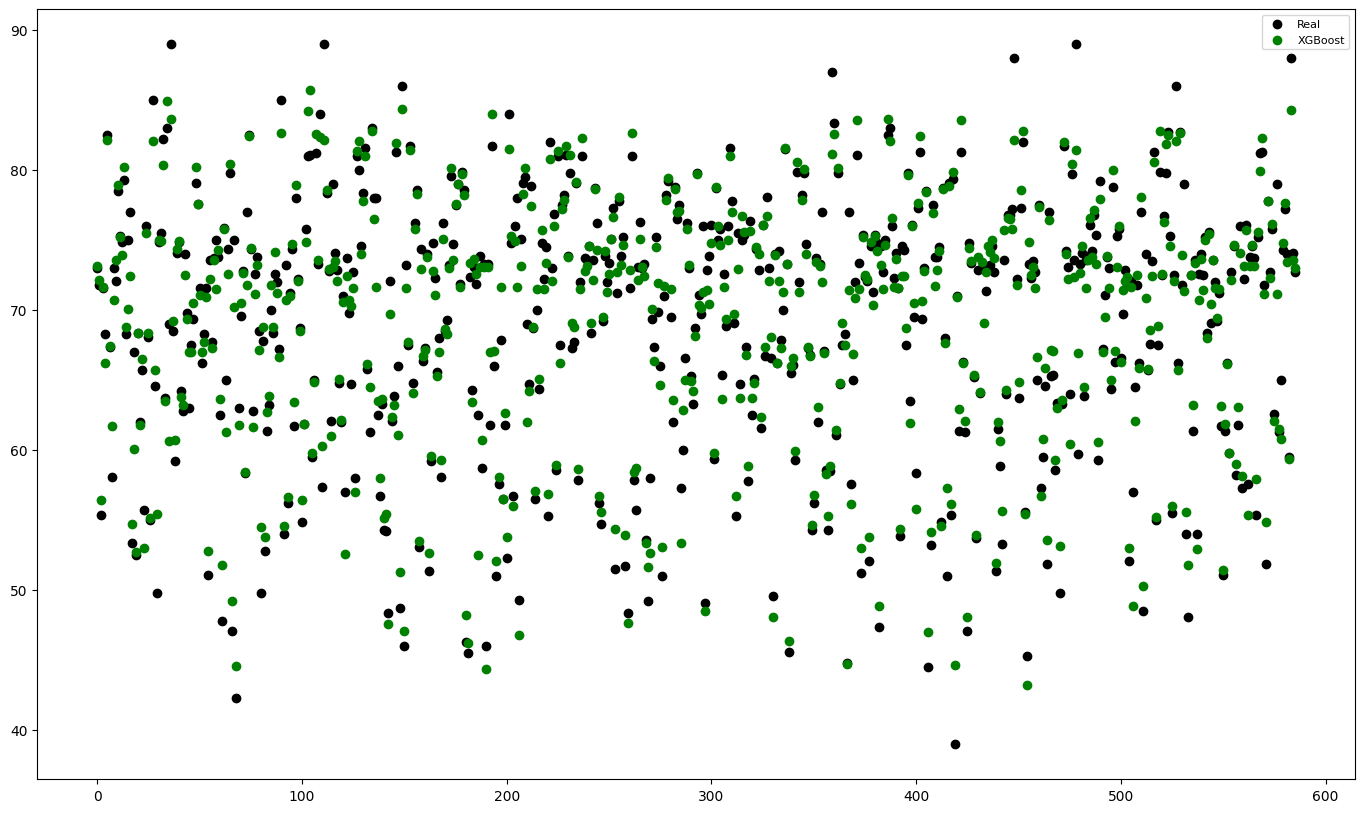

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a colormap with a unique color for each value type
colors = ['red', 'blue', 'green', 'orange']  # Add more colors as needed
cmap = ListedColormap(colors)

# Visualize the predictions of CatBoost along with real values
fig = plt.figure(figsize=(17, 10))

# Plot real values
plt.scatter(range(y_test_xgbr.shape[0]), y_test_xgbr,color='black', label='Real')

# Plot predicted values for XGBoost with different colors based on value type
plt.scatter(range(y_test_xgbr.shape[0]), y_pred_xgbr, color='green', label='XGBoost')

# Add legend and adjust font size
plt.legend(loc='best', prop={'size': 8})

# Show plot
plt.show()


In [ ]:
val_hat

array([80.59455412, 74.85500873, 73.96244441, 70.72012572, 71.86536707,
       67.0179564 , 79.60817738, 60.83178692, 74.08999468, 71.88206889,
       70.0352115 , 68.46571486, 77.42937795, 67.03277612, 62.33235791,
       71.05742904, 70.69866522, 76.52464623, 69.56209302, 76.9177262 ,
       72.17741713, 70.35276029, 75.40212245, 66.86813317, 76.90632366,
       76.5671342 , 77.85069193, 81.83430455, 68.37979285, 69.96405041,
       80.14843734, 71.39732415, 73.34073085, 66.21423309, 69.62911451,
       64.7057102 , 62.56771903, 72.71676457, 76.0546403 , 67.65325346,
       43.18647421, 72.831557  , 73.83512533, 72.38467428, 67.41292056,
       68.2082092 , 70.55535141, 78.77318232, 75.29128105, 70.92404354,
       68.38916194, 58.26286489, 76.54969759, 60.13574345, 70.21377827,
       61.49975296, 72.92145068, 70.36166669, 60.89332564, 66.19866251,
       59.88997499, 72.21393553, 57.67064814, 72.6303878 , 68.75011553,
       75.02683627, 76.927146  , 62.78372297, 69.34486423, 77.16

In [ ]:
y_valid

array([79.1, 74.8, 71.4, 74.1, 73. , 66.5, 81. , 58.8, 76. , 73.2, 74. ,
       69.9, 75.6, 67.3, 64. , 74.2, 69.6, 79.8, 65. , 75.4, 76. , 72.3,
       78. , 68.8, 77.8, 80. , 78.9, 81.2, 78. , 72.2, 77.3, 73.9, 76. ,
       61.6, 72.3, 62.2, 66.2, 75.7, 76. , 73. , 47.8, 75.5, 72.2, 74.2,
       73. , 68.3, 67.5, 78. , 75.4, 77. , 76. , 55. , 78.1, 58.9, 75.4,
       62.2, 73. , 77.6, 57.6, 65.1, 56.1, 75.1, 69. , 69.4, 74. , 75.2,
       75.4, 65.5, 67. , 78.9, 66.6, 80. , 61.4, 48.6, 48.7, 72.2, 62.7,
       57.1, 69.5, 79.8, 81.1, 75. , 66. , 49.4, 79.4, 73.1, 71.8, 67.4,
       76.9, 72.2, 52.3, 73.9, 65.9, 75.2, 57.1, 73. , 73.2, 72.6, 69.7,
       74.6, 74.3, 67.6, 51. , 72.4, 57.5, 75.9, 81.5, 72.9, 68.6, 73.6,
       68. , 52.7, 66.5, 68. , 73.8, 73.8, 74.5, 73.3, 62. , 83. , 58. ,
       74.9, 54.1, 67.8, 66.1, 71. , 78. , 58.3, 72. , 67.5, 71.9, 73.2,
       73. , 73. , 64.1, 61.3, 57.6, 69.1, 79.5, 63.3, 74.4, 74.5, 74.5,
       68.5, 71.9, 77. , 75.6, 76.3, 68.6, 77. , 69

In [ ]:
x_valid

array([[-0.53696178, -0.93951884, -2.43764338, ..., -0.09402327,
        -0.81887049,  1.52817256],
       [ 1.4660731 ,  1.02985001,  0.41023228, ...,  0.97642616,
         0.00627228,  0.78126312],
       [-1.28167988, -1.43186106,  0.41023228, ..., -0.19791555,
        -0.34115625,  0.88796447],
       ...,
       [-0.69104139,  0.78367891,  0.41023228, ..., -0.20578728,
        -0.64515622,  1.52817256],
       [ 0.28479612,  1.27602112,  0.41023228, ..., -0.22084405,
         0.70112936, -1.38833097],
       [ 0.721355  ,  1.27602112,  0.41023228, ..., -0.21677719,
        -0.62344194,  0.0699208 ]])

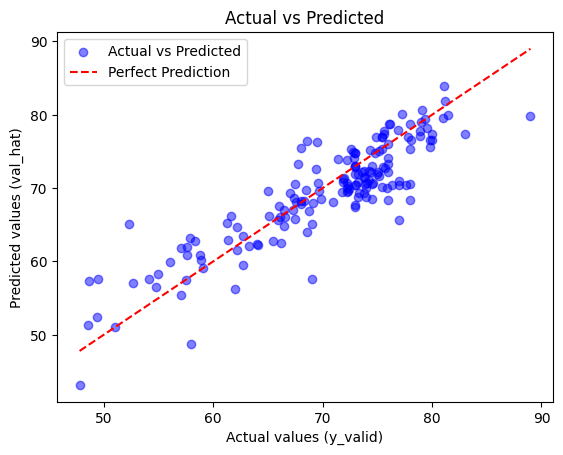

In [ ]:
plt.scatter(y_valid, val_hat, color='blue', label='Actual vs Predicted', alpha=0.5)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual values (y_valid)')
plt.ylabel('Predicted values (val_hat)')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
# Ensure that y_test and y_pred_catboost have the same length
y_test_catboost = y_test[:len(y_pred_catboost)]

# Ensure that y_test and y_pred_xgbr have the same length
y_test_xgbr = y_test[:len(y_pred_xgbr)]

# Ensure that y_test and y_pred_lgbm have the same length
y_test_lgbm = y_test[:len(y_pred_lgbm)]

# Calculate residuals
residuals_catboost = y_test_catboost - y_pred_catboost
residuals_xgboost = y_test_xgbr - y_pred_xgbr
residuals_lightgbm = y_test_lgbm - y_pred_lgbm

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_catboost, residuals_catboost, color='blue', alpha=0.5, label='CatBoost')
plt.scatter(y_pred_xgbr, residuals_xgboost, color='red', alpha=0.5, label='XGBoost')
plt.scatter(y_pred_lgbm, residuals_lightgbm, color='green', alpha=0.5, label='LightGBM')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Different Models')
plt.legend()
plt.grid(True)
plt.show()


ValueError: operands could not be broadcast together with shapes (165,) (586,) 

In [ ]:
import matplotlib.pyplot as plt

# Create a time index (assuming your data is ordered by time)
time_index = range(len(y_valid))

# Plotting the actual vs predicted values as a time series
plt.plot(time_index, y_valid, color='blue', label='Actual')
plt.plot(time_index, val_hat, color='red', label='Predicted')
plt.plot(time_index, y_test, color='yellow', label='Actual og')
plt.plot(time_index, y_pred_catboost, color='green', label='Catboost')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Time Series')
plt.legend()
plt.show()


In [ ]:
test_predictions=[]

In [ ]:
test_predictions=y_valid